In [5]:
import numpy as np

from matplotlib import pyplot as plt
import pylab

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
x, y = mnist['data'], mnist['target']

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

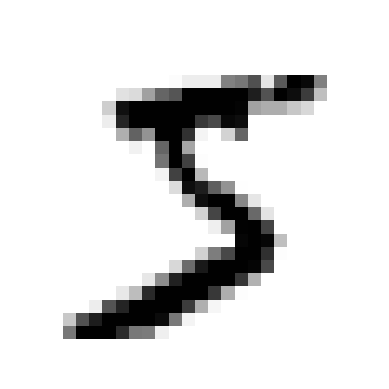

In [10]:
un_digito = x[0]
plot_digit(un_digito)

In [11]:
y = y.astype(int)
y[0]

5

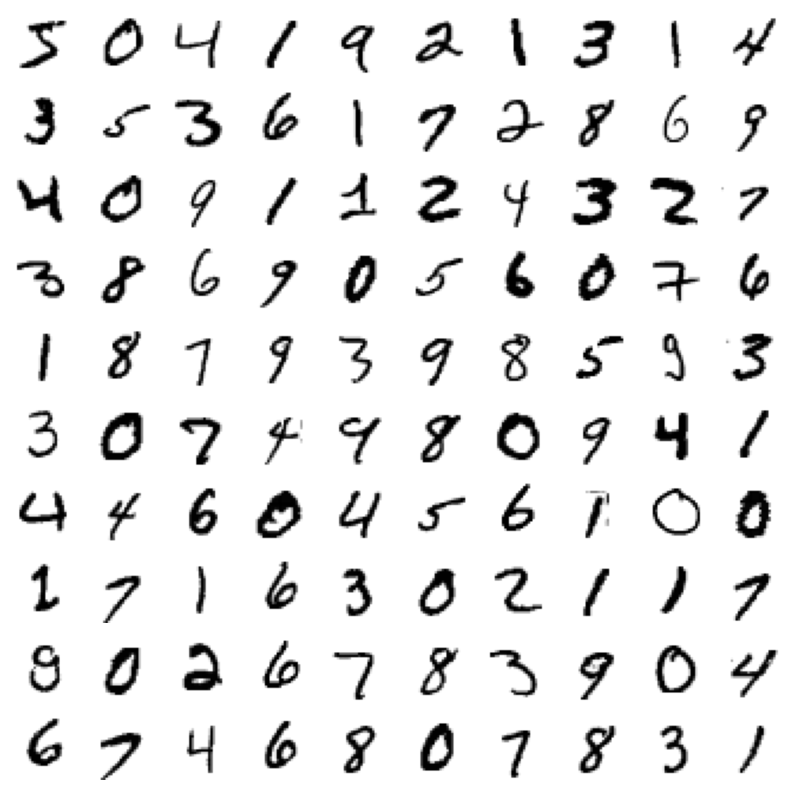

In [12]:
plt.figure(figsize=(10,10))
for i, image_data in enumerate(x[:100]):
    plt.subplot(10,10,i+1)
    plot_digit(image_data)
plt.show()

In [13]:
x_train,x_test,y_train,y_test = x[:60000], x[60000:],y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)


SGDClassifier()

In [16]:
sgd_clf.predict([x_train[0]])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.96415, 0.9568 , 0.912  ])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.96225, 0.9686 , 0.9634 ])

### Inciso para mostrar que puede haber problemas

(Solo los dos siguientes)

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [20]:
m5_clf = Never5Classifier()
cross_val_score(m5_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53645,   934],
       [ 1037,  4384]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8243700639338097

In [24]:
recall_score(y_train_5, y_train_pred)

0.8087068806493267

In [25]:
f1_score(y_train_5, y_train_pred)

0.8164633578545488

In [26]:
y_scores = sgd_clf.decision_function([x[0]])
y_scores


array([1044.21812978])

In [27]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1411.66787911, -13611.97456071, -29994.45787956, ...,
        23102.66569655,  -9800.63822332,  -6176.00442516])

In [28]:
threshold = 3000
y_pred_new = (y_scores > threshold)

In [29]:
print(precision_score(y_train_5,y_pred_new))
print(recall_score(y_train_5,y_pred_new))

0.8343489054389528
0.6819774949271352


In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5,y_scores)

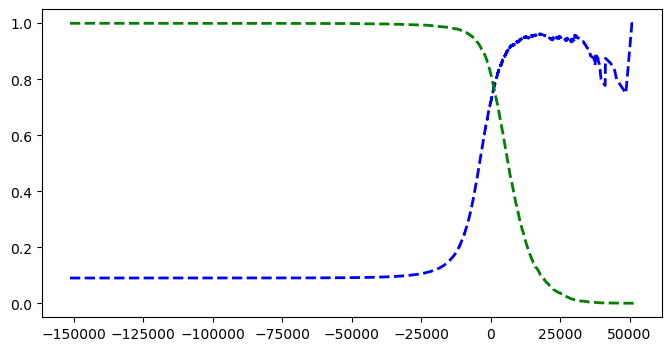

In [31]:
plt.figure(figsize=(8,4))
plt.plot(threshold, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

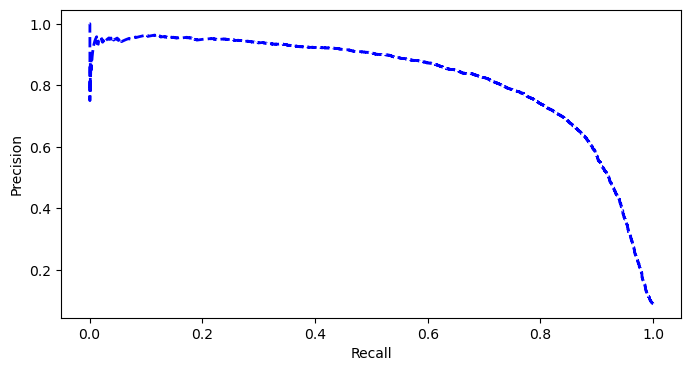

In [32]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

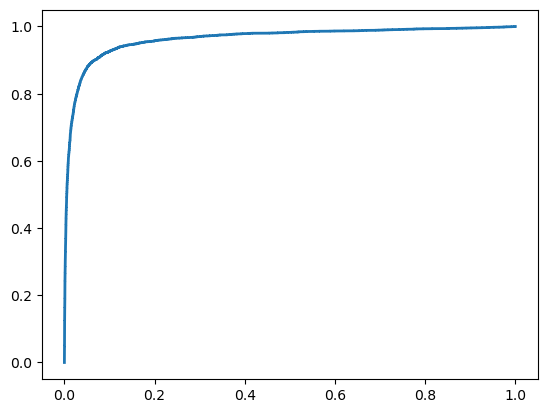

In [33]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
plt.plot(fpr,tpr,linewidth = 2,label ="ROC curve")

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)


0.9634997049525603

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

y_pruebas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

y_pruebas_forest[:4]

array([[0.2 , 0.8 ],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ]])

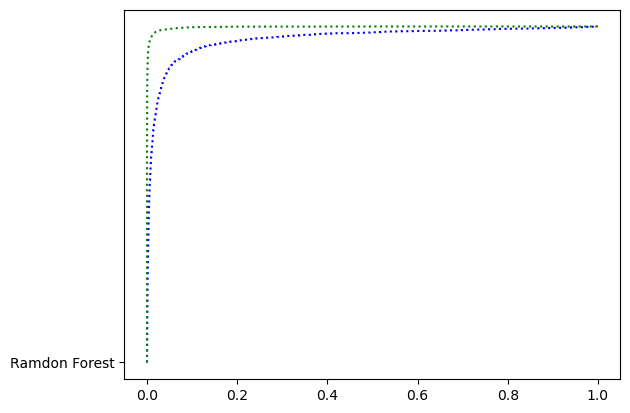

In [36]:
y_scores_forest = y_pruebas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,"g:","Ramdon Forest")

In [37]:
y_train_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3)
print(roc_auc_score(y_train_5, y_scores_forest))
print(precision_score(y_train_5, y_train_forest))
print(recall_score(y_train_5, y_train_forest))

0.9983238977401093
0.9901115085209341
0.86810551558753


In [38]:
un_digito = x[0]
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(x_train[:2000],y_train[:2000])
print(svc_clf.predict([un_digito]))
un_digito_scores = svc_clf.decision_function([un_digito])
un_digito_scores.round(2)

[5]


array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [39]:
clase_id = un_digito_scores.argmax()
clase_id

5

In [40]:
print(f"El score maximo es el del elemento {clase_id} que vale {un_digito_scores[0][clase_id]} y corresponde a la clase {svc_clf.classes_[clase_id]}")

El score maximo es el del elemento 5 que vale 9.301575971974335 y corresponde a la clase 5


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train[:2000], y_train[:2000])
ovr_clf.predict([un_digito])

In [41]:
sgd_clf = SGDClassifier()
# sgd_clf.fit(x_train,y_train)
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9008, 0.8998, 0.908 ])

In [42]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train)
y_train_pred = sgd_clf.predict(x_train)

In [43]:
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[5739,    1,   17,   35,   15,   50,   26,    5,   32,    3],
       [   2, 6560,   70,   33,   14,   25,    3,   13,   21,    1],
       [  26,   41, 5318,  166,   57,   63,   38,   71,  172,    6],
       [   9,   19,  140, 5331,   23,  399,   10,   65,  109,   26],
       [   5,   24,   21,   14, 5699,   19,   18,    5,   12,   25],
       [  35,   17,   36,  194,  113, 4844,   46,   34,   62,   40],
       [  23,   12,   45,    5,   76,  262, 5486,    0,    9,    0],
       [  15,   20,   75,   37,  151,   12,    5, 5868,   17,   65],
       [  39,  109,  130,  242,  190,  709,   30,   54, 4308,   40],
       [  32,   34,   20,  174, 1064,  132,    1,  403,   53, 4036]],
      dtype=int64)

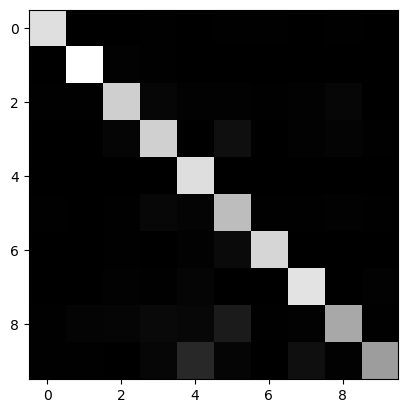

In [44]:
plt.imshow(cm, cmap="gray")

In [46]:
suma_filas = cm.sum(axis=1, keepdims=True)
suma_filas

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

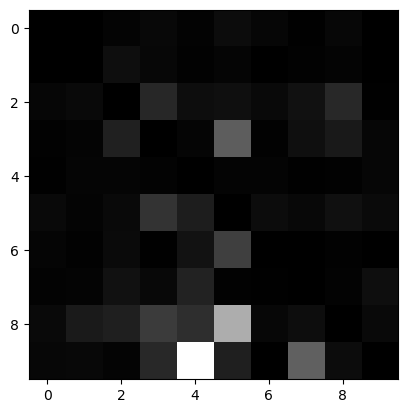

In [50]:
cm2 = cm/suma_filas
np.fill_diagonal(cm2,0)
plt.imshow(cm2, cmap="gray")

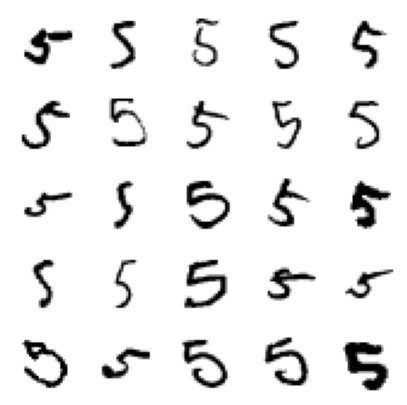

In [51]:
x_5_como_8 = x_train[(y_train==5) & (y_train_pred==8)]

plt.figure(figsize=(5,5))
for i, image_data in enumerate(x_5_como_8[:25]):
    plt.subplot(5,5,i+1)
    plot_digit(image_data)
plt.show()